# **Student Performance Prediction**

In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Refactor dataset: Drop G1 & G2 / Convet G3 to pass or fail
input_file = 'student-por.csv' 
output_file = 'student-por-clean.csv'  

with open(input_file, 'r', encoding='utf-8') as file:
    file_content = file.read()

file_content = file_content.replace(';', ',')

with open(output_file, 'w', encoding='utf-8') as file:
    file.write(file_content)

df = pd.read_csv("student-por-clean.csv")
df["passed"] = df["G3"].apply(lambda x: "Pass" if x > 10 else "Fail")
df = df.drop(columns=["G3"])
df.to_csv("student-data-main.csv", index=False)

# EDA

In [3]:
df = pd.read_csv("student-data-main.csv")
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2 passed  
0      4        3      4     1     1      3        4   0  11   Pass  
1      5        3      3     1     1      3        2   9  11   Pass  
2      4        3      2     2     3      3        6  12  13   Pass  
3      3        2      2     1     1      5        0  14  14   Pass  
4      4        3      2     1     2      5        0  11  13   Pass  

[5 rows x 33 columns]


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (649, 33)


In [5]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
passed        object
dtype: object


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
# For numerical features
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

In [8]:
#Check unique values for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()

Column: school
school
GP    423
MS    226
Name: count, dtype: int64

Column: sex
sex
F    383
M    266
Name: count, dtype: int64

Column: address
address
U    452
R    197
Name: count, dtype: int64

Column: famsize
famsize
GT3    457
LE3    192
Name: count, dtype: int64

Column: Pstatus
Pstatus
T    569
A     80
Name: count, dtype: int64

Column: Mjob
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

Column: Fjob
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64

Column: reason
reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64

Column: guardian
guardian
mother    455
father    153
other      41
Name: count, dtype: int64

Column: schoolsup
schoolsup
no     581
yes     68
Name: count, dtype: int64

Column: famsup
famsup
yes    398
no     251
Name: count, dtype: int64

Column: paid
paid
no     610
yes     39
Name:

Numerical features: Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')


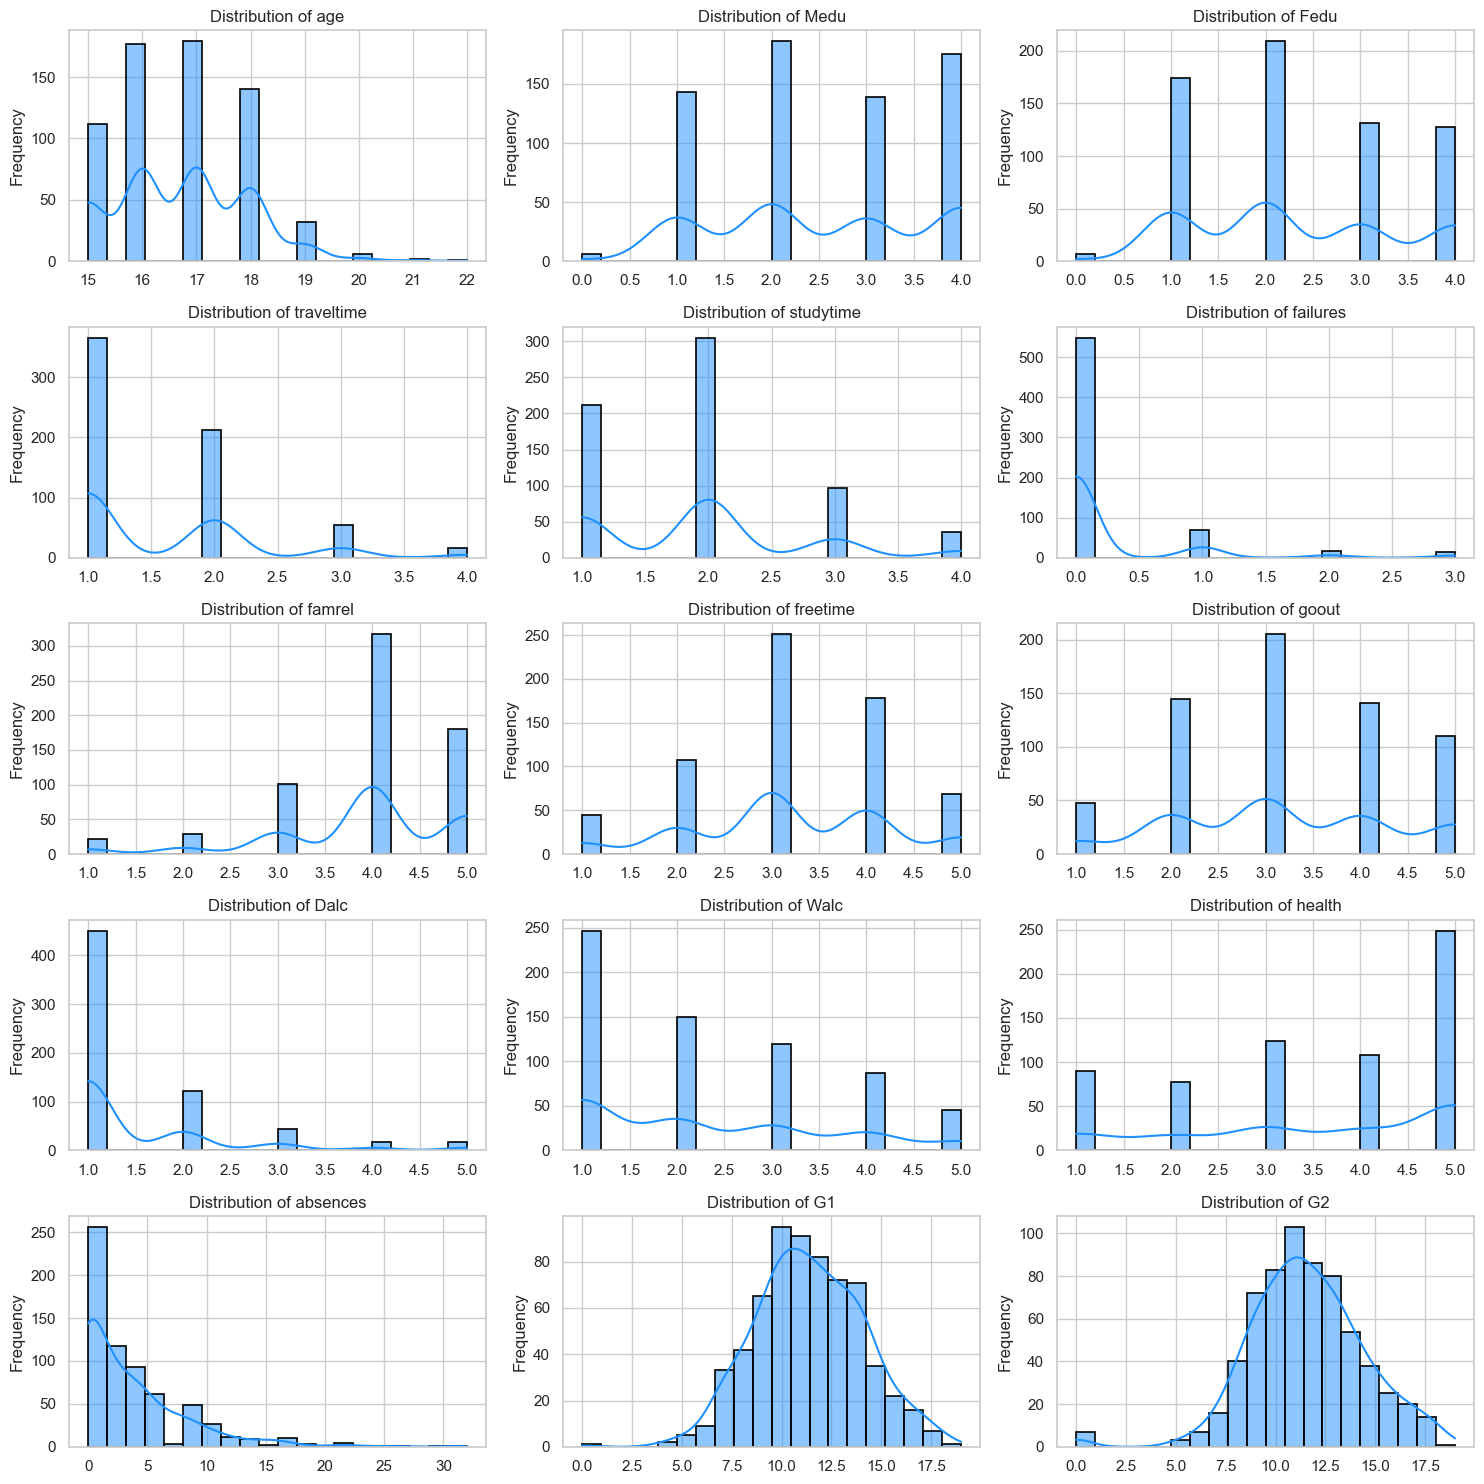

In [9]:
#EDA - distribution of numeric attributes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical features:", numeric_features)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))

num_rows = (len(numeric_features) + 2) // 3  
num_cols = 3

# plot
for i, col in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='dodgerblue', edgecolor='black', linewidth=1.2)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

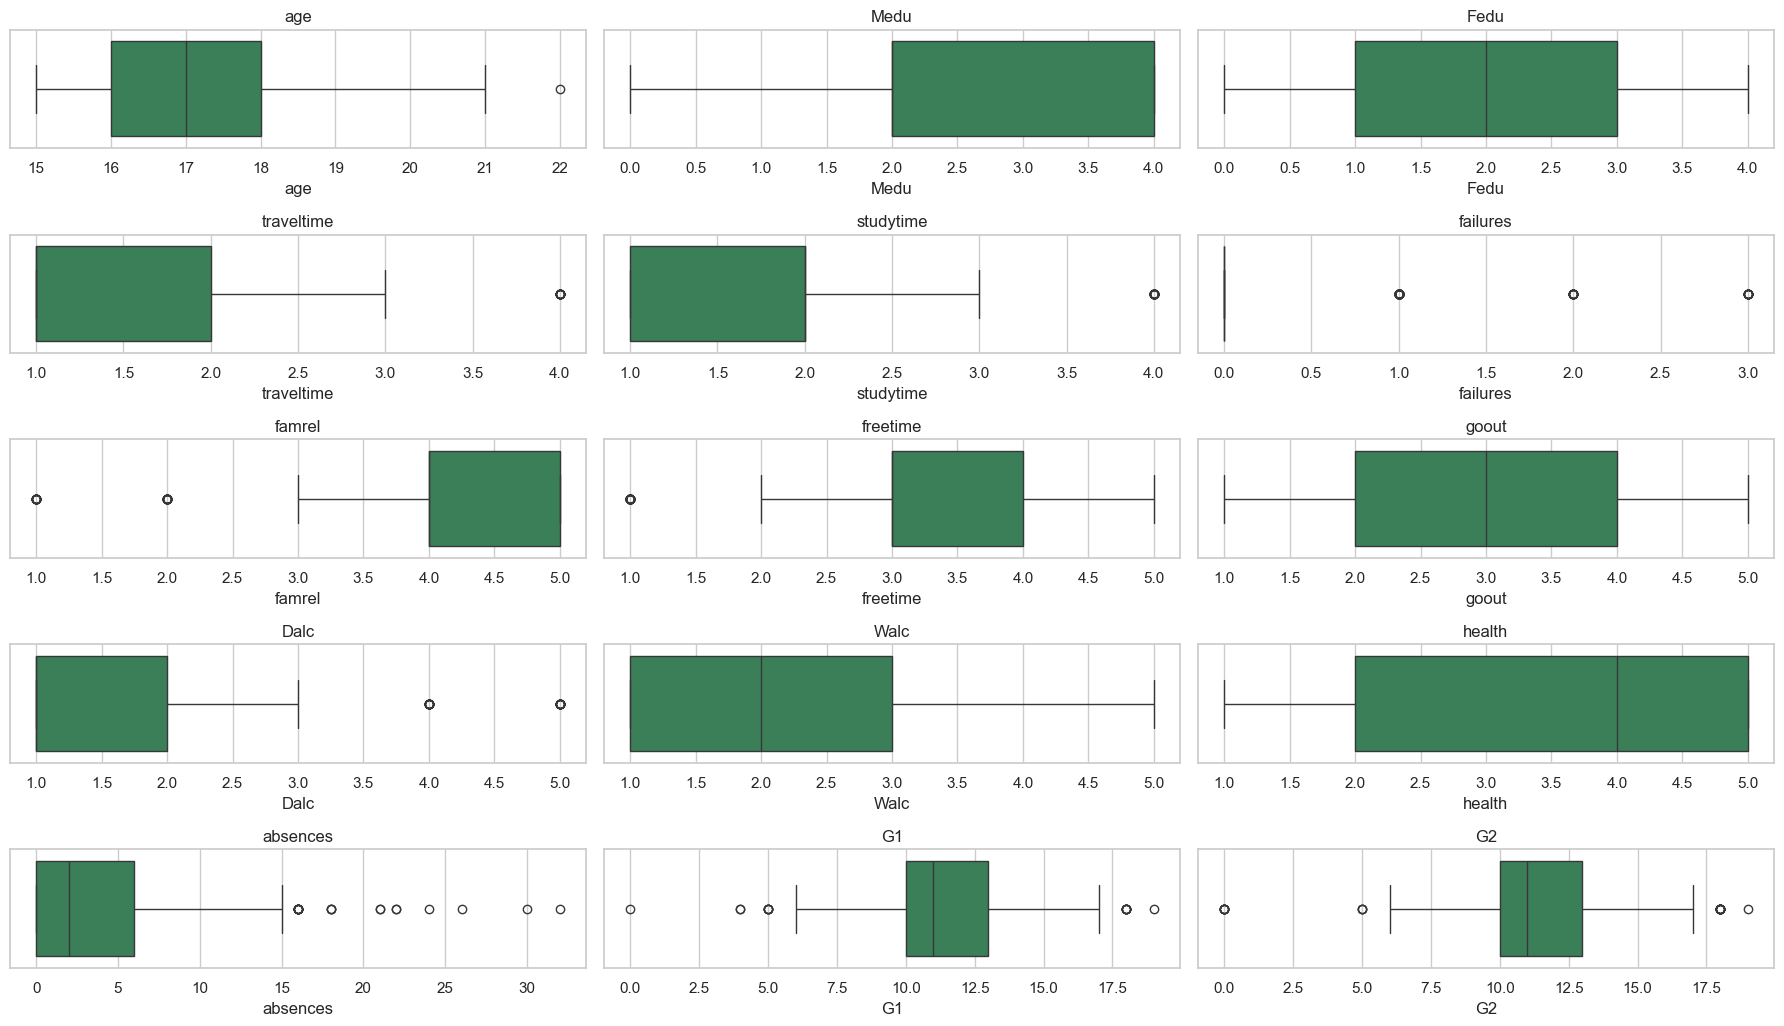

In [10]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_features):
    plt.subplot((len(numeric_features) // 3) + 1, 3, i+1)
    sns.boxplot(x=df[col], color="seagreen")  
    plt.title(col)

plt.tight_layout()
plt.show()

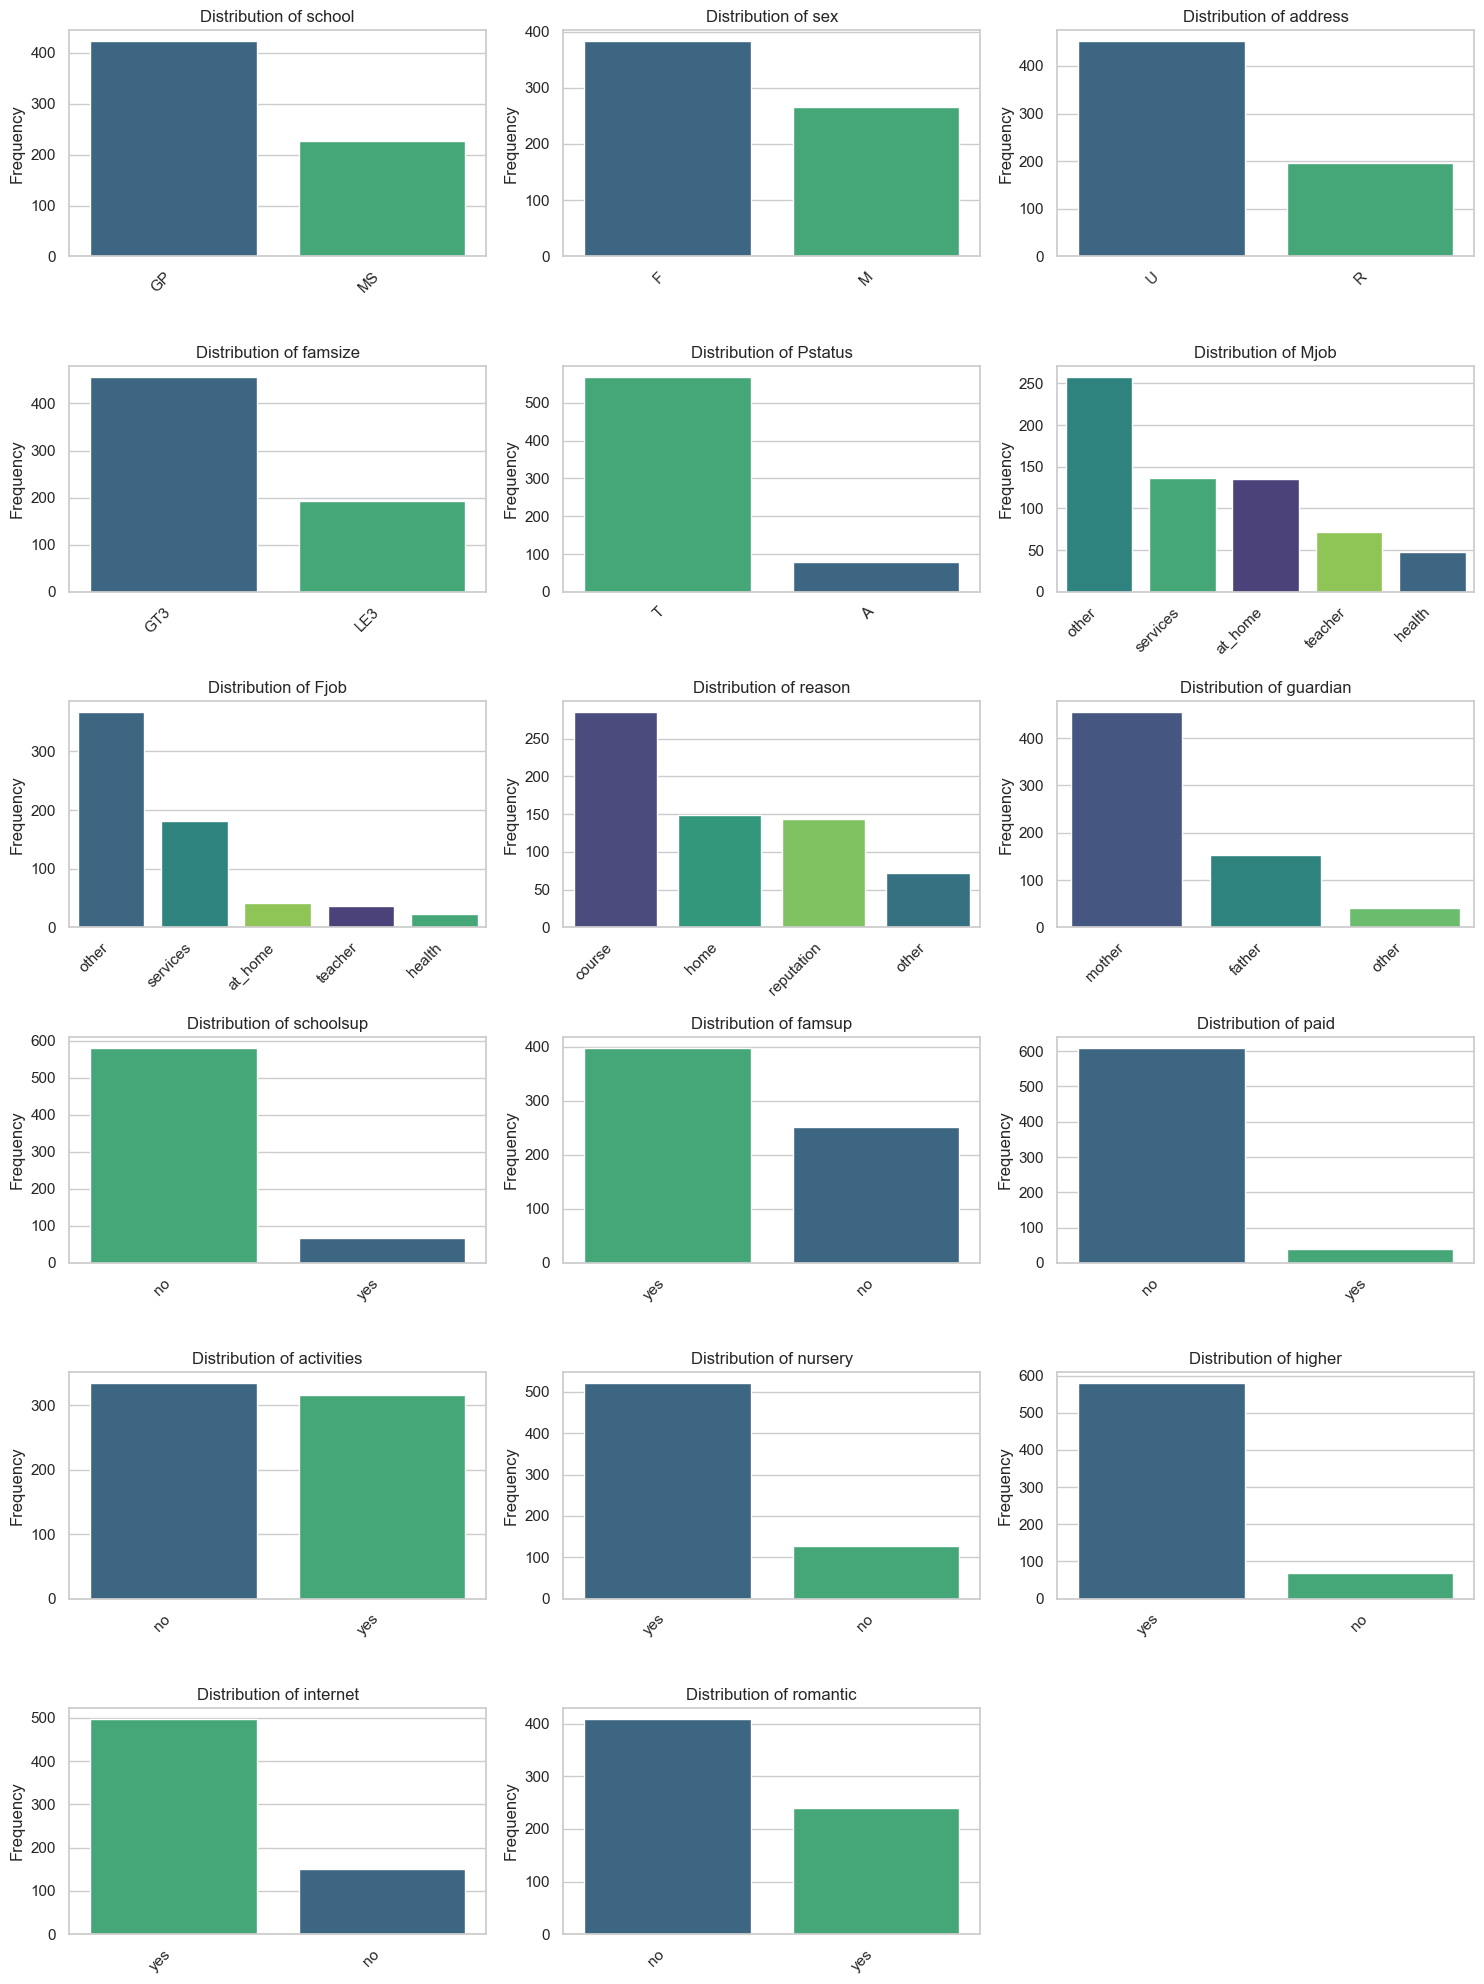

In [11]:
# distribution of categorical attributes
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

if 'passed' in categorical_features:
    categorical_features.remove('passed')
    
sns.set_style("whitegrid")
plt.figure(figsize=(15, 20))

num_rows = (len(categorical_features) + 2) // 3
num_cols = 3

for i, col in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


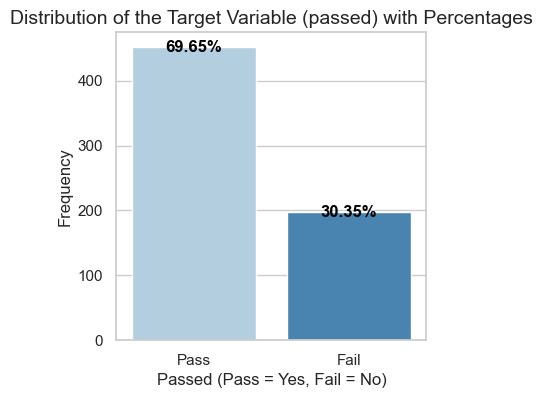

In [12]:
# Distribution of the target variable
plt.figure(figsize=(4, 4))

total = len(df)
ax = sns.countplot(x='passed', data=df, hue='passed', palette='Blues', legend=False)

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100 
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')

plt.title('Distribution of the Target Variable (passed) with Percentages', fontsize=14)
plt.xlabel('Passed (Pass = Yes, Fail = No)')
plt.ylabel('Frequency')
plt.show()


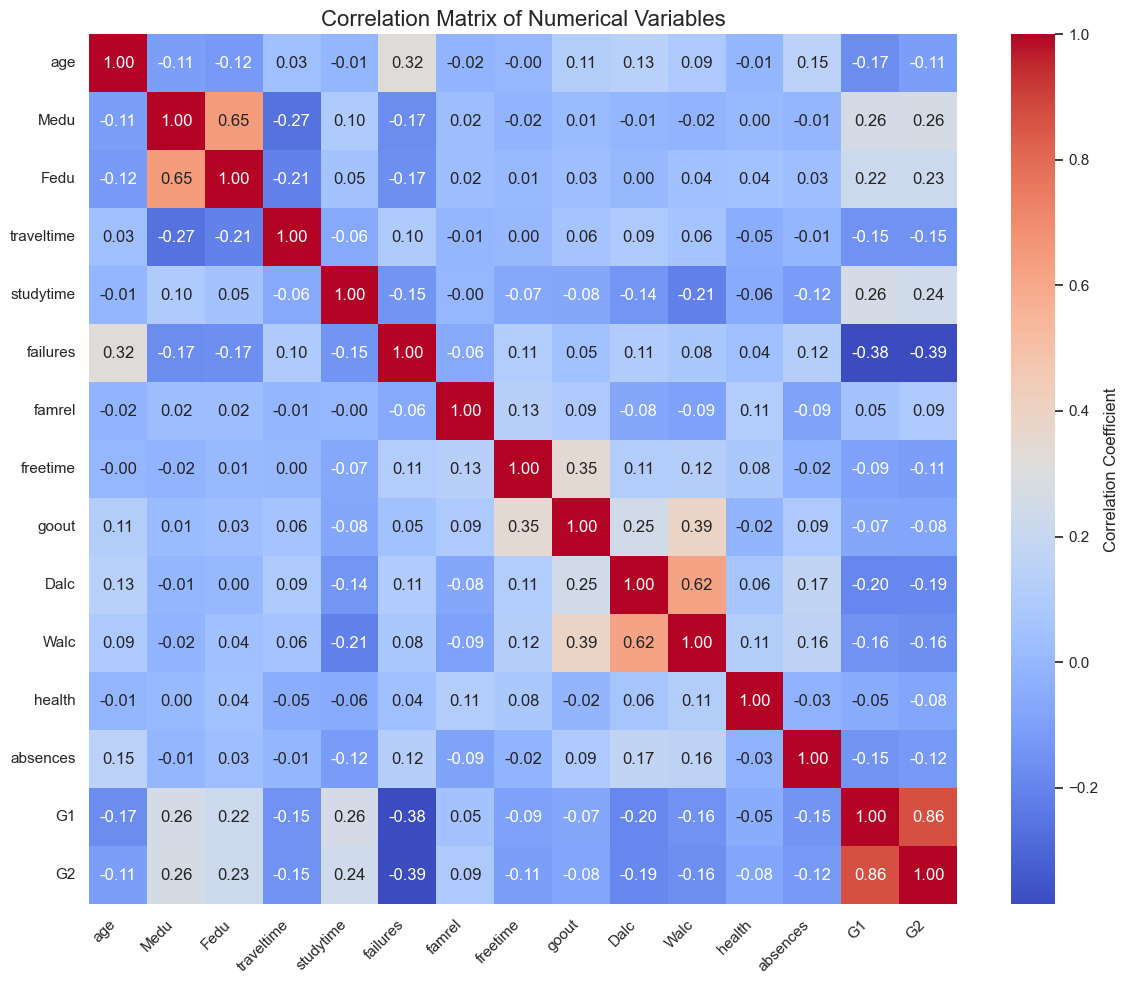

In [13]:
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

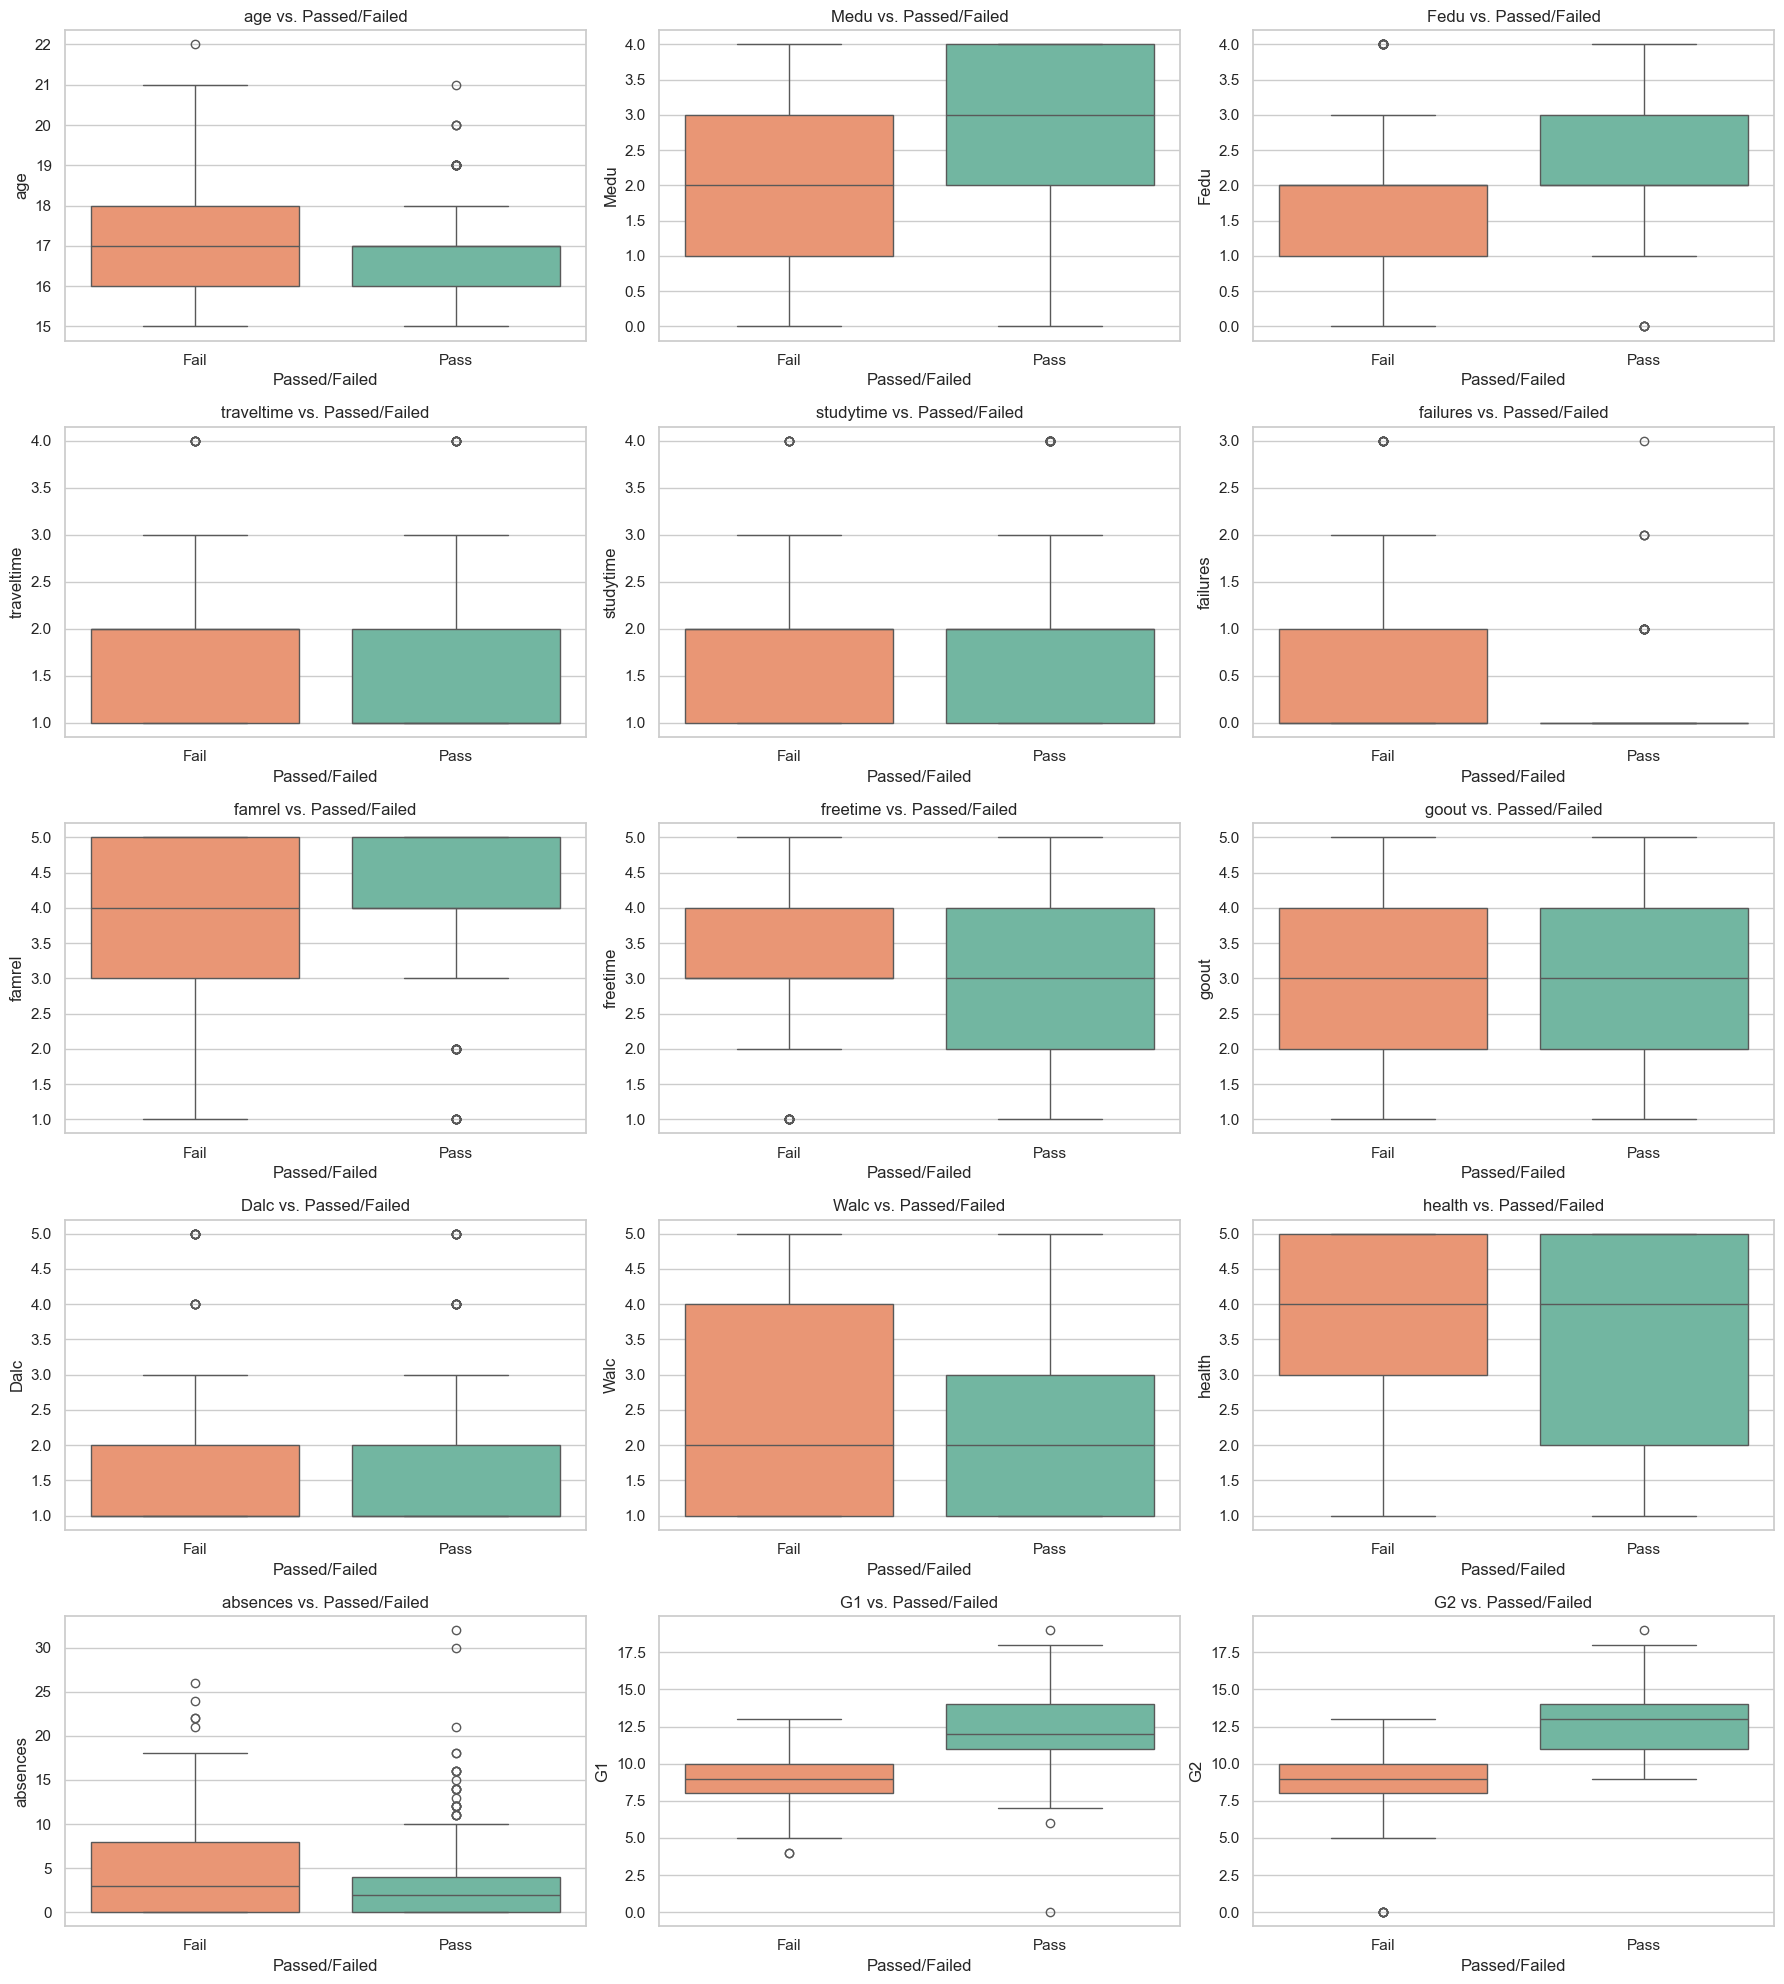

In [14]:
# Bivariate analysis – numerical variables
plt.figure(figsize=(18, 20))
num_rows = (len(numeric_features) + 2) // 3
num_cols = 3

for i, col in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(
    x='passed', y=col, data=df,
    order=['Fail', 'Pass'],
    hue='passed',
    palette='Set2',
    legend=False
)

    plt.title(f'{col} vs. Passed/Failed', fontsize=12)
    plt.xlabel('Passed/Failed')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

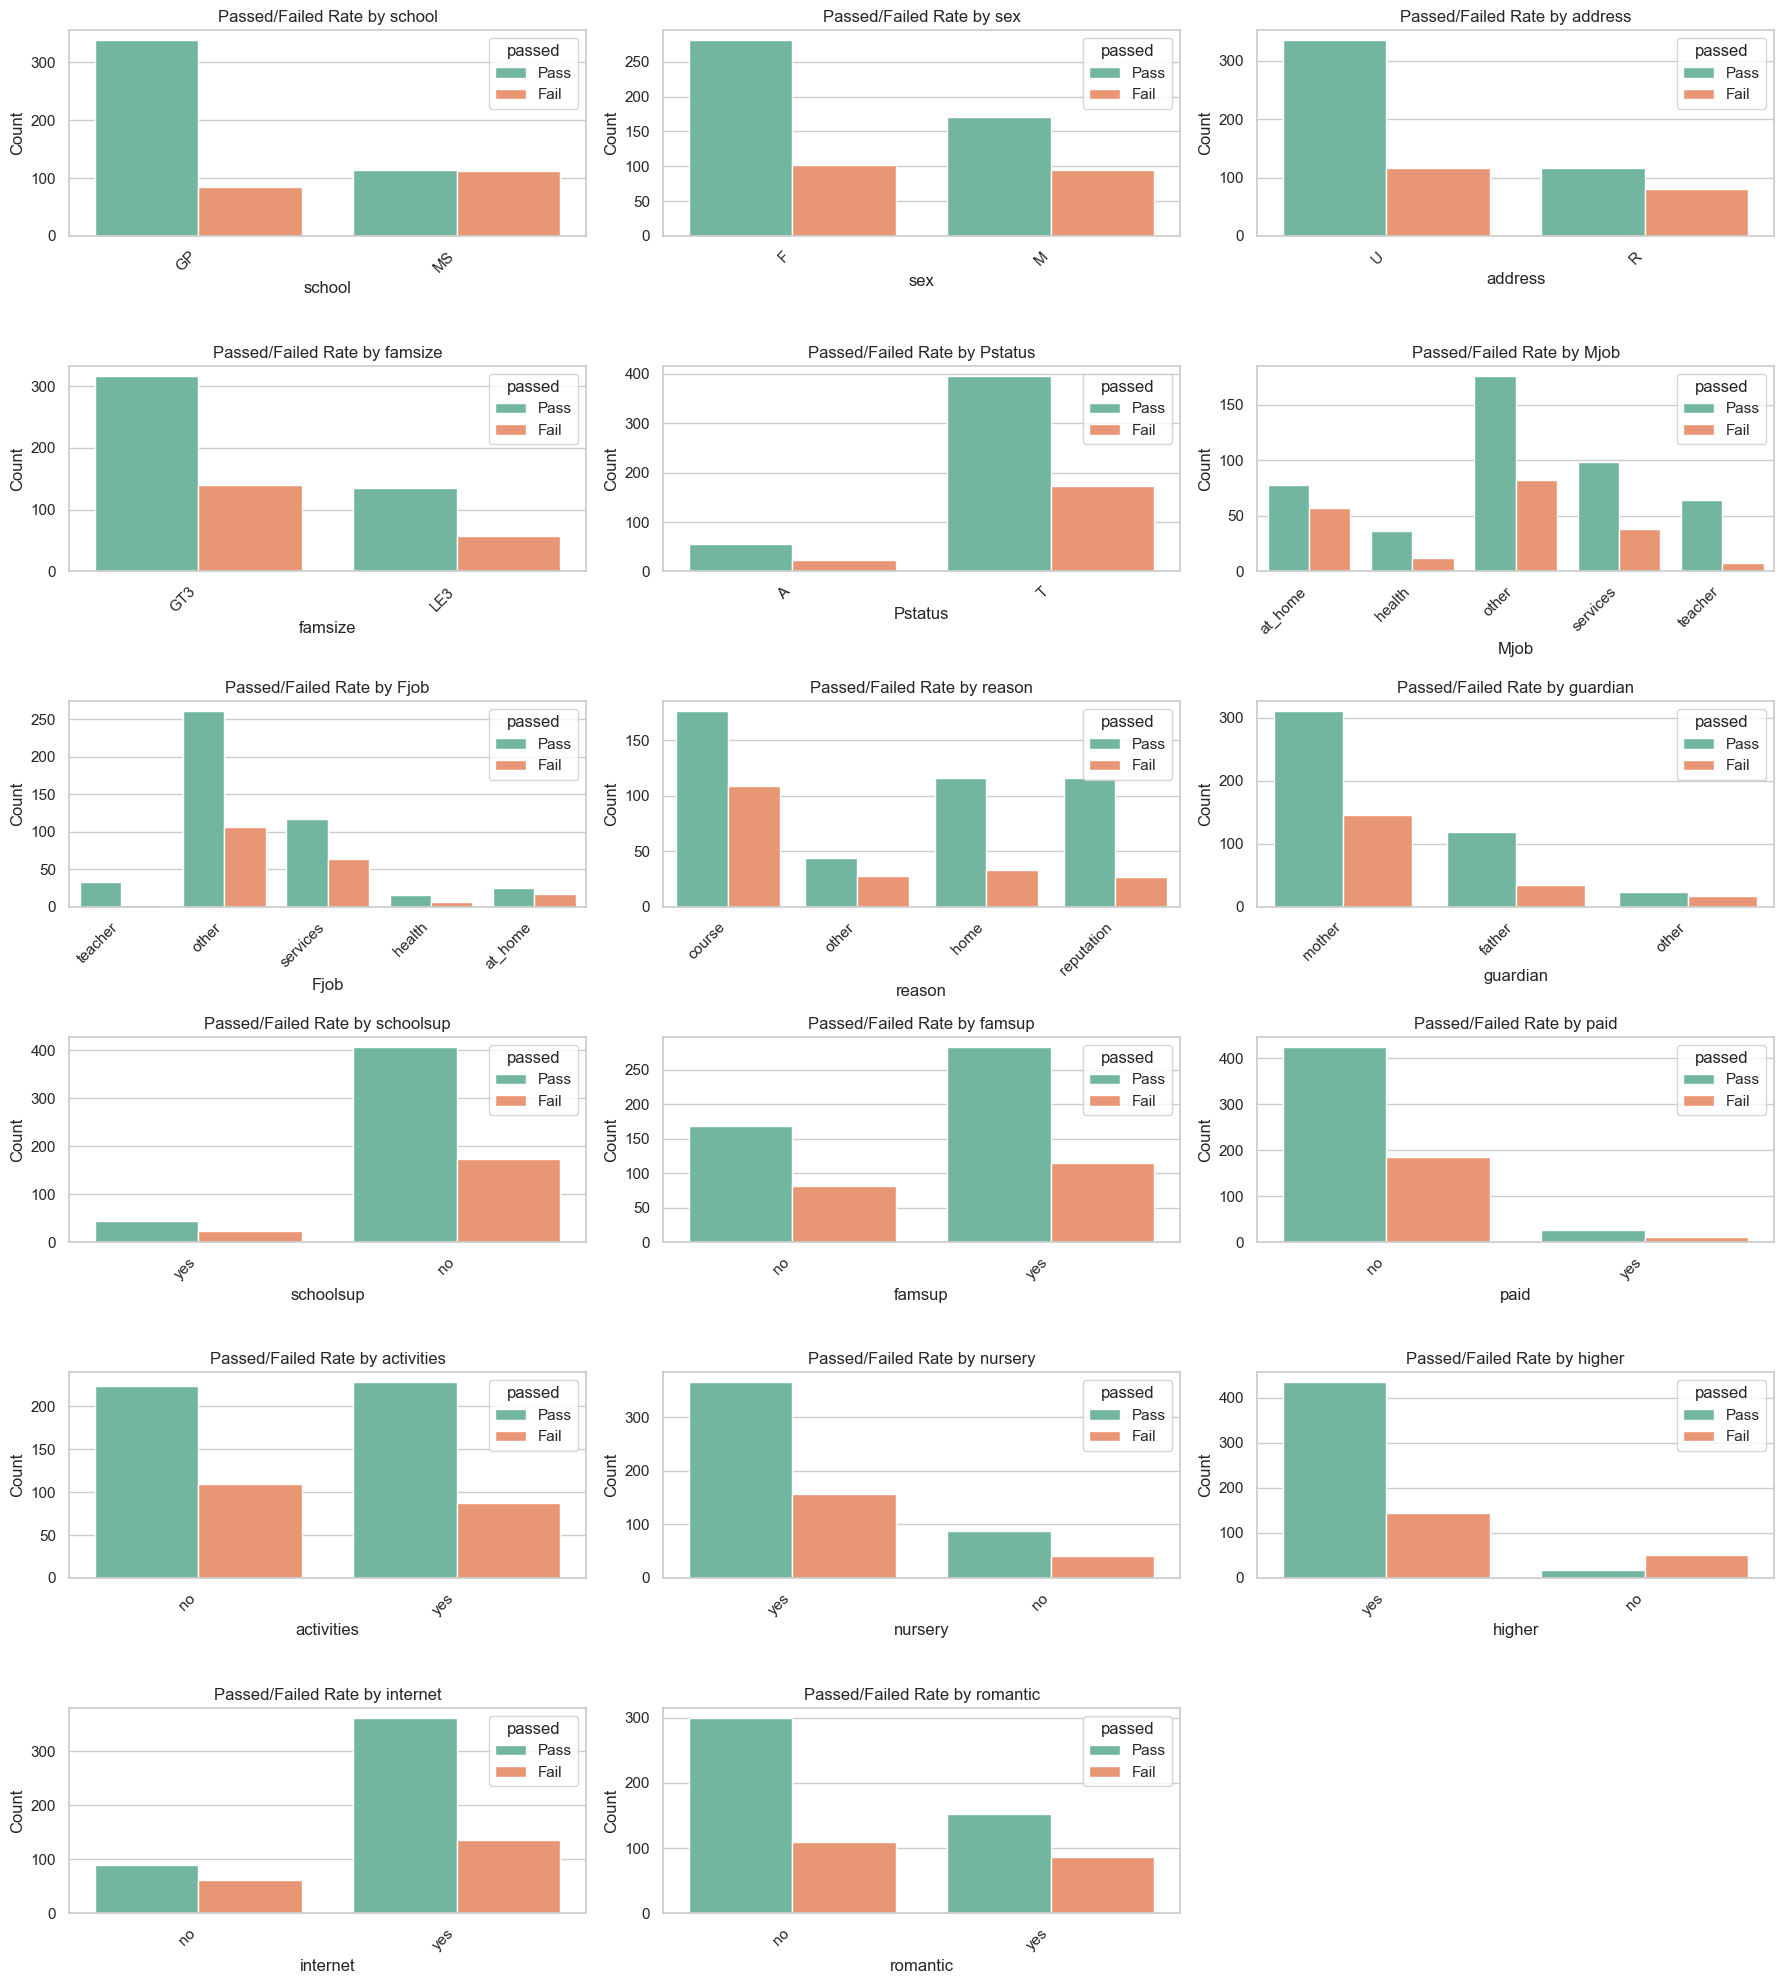

In [15]:
# Bivariate analysis – categorical variables
plt.figure(figsize=(18, 20))
num_rows = (len(categorical_features) + 2) // 3
num_cols = 3

for i, col in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=col, hue='passed', data=df, palette='Set2')
    plt.title(f'Passed/Failed Rate by {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Preprocess

### check null values

In [16]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
passed        0
dtype: int64

### Check Duplicated values

In [17]:
duplicates = df.duplicated()
print('number of duplicated rows: ',duplicates.sum())

number of duplicated rows:  0


### Outlier detection

In [18]:
# Number of outliers in each column
outlier_info = {}
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
    outlier_info[col] = outliers.sum()

outlier_counts = pd.DataFrame.from_dict(outlier_info, orient='index', columns=['outlier_count'])
print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
            outlier_count
age                     1
Medu                    0
Fedu                    0
traveltime             16
studytime              35
failures              100
famrel                 51
freetime               45
goout                   0
Dalc                   34
Walc                    0
health                  0
absences               21
G1                     16
G2                     25


In [19]:
# Step 2: Distribution of outliers for fail/pass
outlier_distribution = {}
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
    dist = df[outliers].groupby("passed")[col].count()
    outlier_distribution[col] = dist.to_dict()

outlier_dist_df = pd.DataFrame(outlier_distribution).T.fillna(0).astype(int)
print("outlier distribution in pass and failed class:")
print(outlier_dist_df)

outlier distribution in pass and failed class:
            Fail  Pass
age            1     0
Medu           0     0
Fedu           0     0
traveltime     7     9
studytime      7    28
failures      81    19
famrel        21    30
freetime      16    29
goout          0     0
Dalc          15    19
Walc           0     0
health         0     0
absences      12     9
G1             7     9
G2            10    15


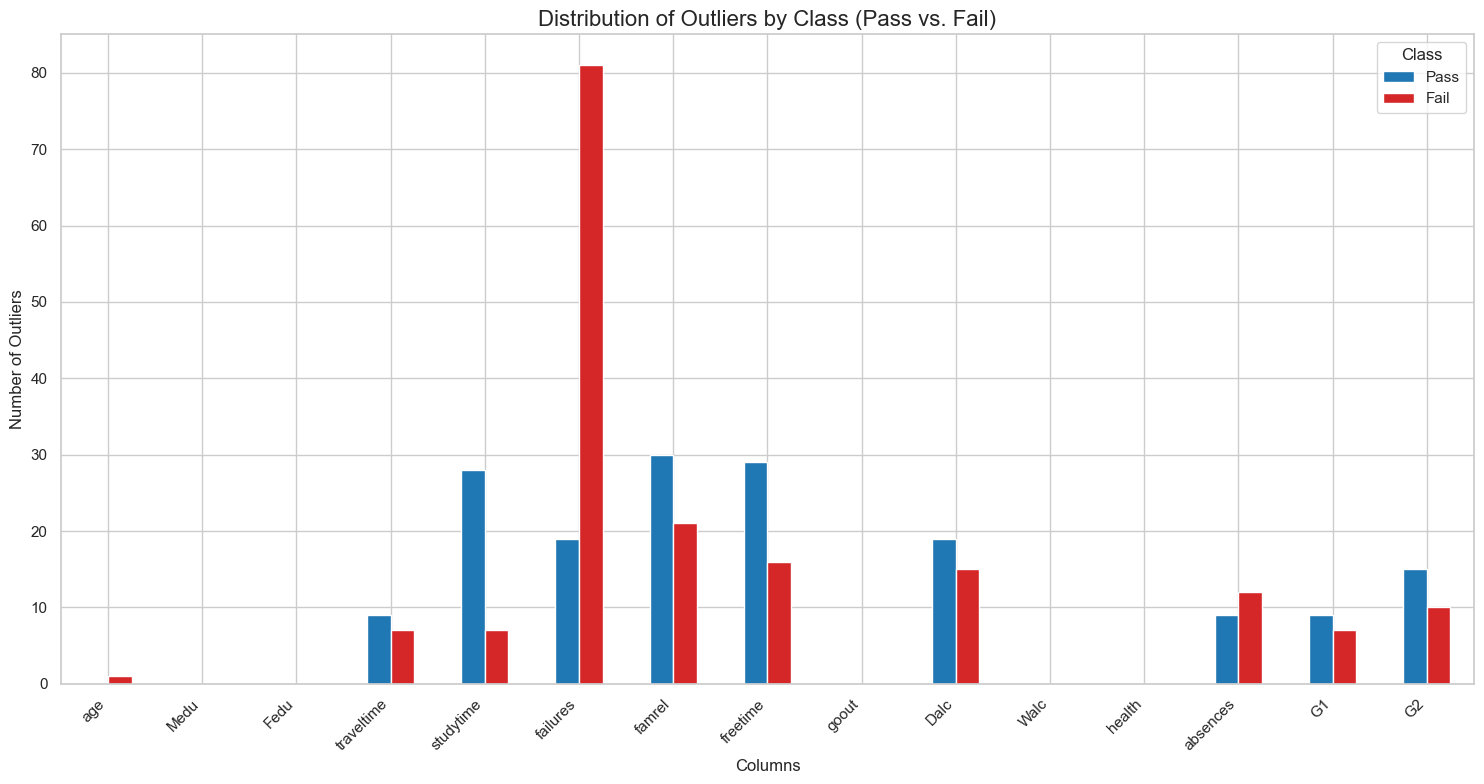

In [20]:
outlier_distribution = {}
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    pass_outliers = outliers[outliers['passed'] == 'Pass']
    fail_outliers = outliers[outliers['passed'] == 'Fail']
    
    outlier_distribution[col] = {
        'Pass': len(pass_outliers),
        'Fail': len(fail_outliers)
    }

outlier_distribution_df = pd.DataFrame(outlier_distribution).T

# Plotting the grouped bar chart
outlier_distribution_df.plot(kind='bar', figsize=(15, 8), color=['#1f77b4', '#d62728'])
plt.title('Distribution of Outliers by Class (Pass vs. Fail)', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Outliers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

Rows with most outlier features:
     outlier_count passed  age  Medu  Fedu  traveltime  studytime  failures  \
567              4   Fail   18     3     2           1          1         1   
572              4   Fail   16     3     2           2          2         2   
491              4   Fail   19     1     1           2          2         1   
338              4   Pass   17     3     1           2          4         0   
606              3   Pass   17     4     2           2          4         0   
66               3   Pass   15     4     4           1          4         0   
523              3   Fail   18     4     4           1          4         0   
518              3   Fail   18     2     4           1          2         1   
502              3   Fail   17     2     2           3          4         1   
108              3   Pass   15     4     4           4          4         0   

     famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
567       2         3      1

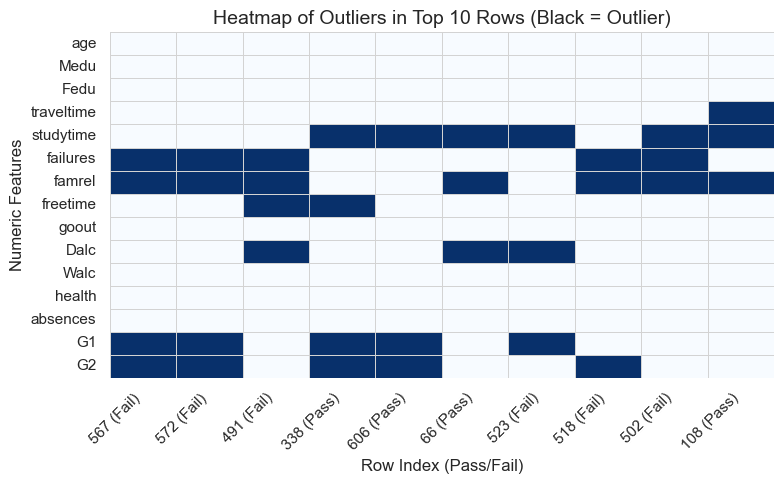

In [21]:
outlier_rows = pd.DataFrame(False, index=df.index, columns=numeric_features)

for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_rows[col] = (df[col] < lower) | (df[col] > upper)

df['outlier_count'] = outlier_rows.sum(axis=1)

rows_with_most_outliers = df.sort_values('outlier_count', ascending=False).head(10)

print("Rows with most outlier features:")
print(rows_with_most_outliers[['outlier_count', 'passed'] + numeric_features.tolist()])

top_outlier_rows_df = outlier_rows.loc[rows_with_most_outliers.index]

row_labels = [
    f"{idx} ({rows_with_most_outliers.loc[idx,'passed']})"
    for idx in rows_with_most_outliers.index
]

plt.figure(figsize=(8, 5))
sns.heatmap(top_outlier_rows_df.T, cmap='Blues', cbar=False,
            linewidths=0.5, linecolor='lightgray',
            xticklabels=row_labels)   # Adding Fail/Pass to column labels
plt.title('Heatmap of Outliers in Top 10 Rows (Black = Outlier)', fontsize=14)
plt.xlabel('Row Index (Pass/Fail)')
plt.ylabel('Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [22]:
print("\nDataFrame Shape before cleaning:", df.shape)
df = df[df['outlier_count'] != 4]
df = df[df['age'] != 22]
df = df.drop(columns=['outlier_count'])
print("DataFrame Shape after cleaning:", df.shape)
# A column containing the number of outliers was added to the dataset and then removed


DataFrame Shape before cleaning: (649, 34)
DataFrame Shape after cleaning: (644, 33)


### Lable Encoding

In [23]:
#Binary Encoding for two-value categorical features
binary_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'passed'
]

binary_mapping = {
    'GP': 0, 'MS': 1,
    'F': 0, 'M': 1,
    'U': 0, 'R': 1,
    'GT3': 0, 'LE3': 1,
    'T': 0, 'A': 1,
    'yes': 1, 'no': 0,
    'Pass':1, 'Fail':0
}

for col in binary_cols:
    df[col] = df[col].map(binary_mapping).astype(int)

print("Binary encoding completed successfully.")
print("The first 5 rows of the DataFrame after binary encoding:")
print(df.head(5))

Binary encoding completed successfully.
The first 5 rows of the DataFrame after binary encoding:
   school  sex  age  address  famsize  Pstatus  Medu  Fedu     Mjob      Fjob  \
0       0    0   18        0        0        1     4     4  at_home   teacher   
1       0    0   17        0        0        0     1     1  at_home     other   
2       0    0   15        0        1        0     1     1  at_home     other   
3       0    0   15        0        0        0     4     2   health  services   
4       0    0   16        0        0        0     3     3    other     other   

   ... famrel freetime  goout  Dalc  Walc  health  absences  G1  G2  passed  
0  ...      4        3      4     1     1       3         4   0  11       1  
1  ...      5        3      3     1     1       3         2   9  11       1  
2  ...      4        3      2     2     3       3         6  12  13       1  
3  ...      3        2      2     1     1       5         0  14  14       1  
4  ...      4        3    

In [24]:
# Define the list of nominal columns for One-Hot Encoding
nominal_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

print("DataFrame shape before One-Hot Encoding:", df.shape)

# drop_first=True is used to avoid multicollinearity by dropping the first category of each feature.
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

print("\nDataFrame shape after One-Hot Encoding:", df.shape)

print("\nFirst 5 rows of the DataFrame with new encoded columns:")
print(df.head())

DataFrame shape before One-Hot Encoding: (644, 33)

DataFrame shape after One-Hot Encoding: (644, 42)

First 5 rows of the DataFrame with new encoded columns:
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        0        0        1     4     4           2   
1       0    0   17        0        0        0     1     1           1   
2       0    0   15        0        1        0     1     1           1   
3       0    0   15        0        0        0     4     2           1   
4       0    0   16        0        0        0     3     3           1   

   studytime  ...  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \
0          2  ...             0            0           0              0   
1          2  ...             0            0           1              0   
2          2  ...             0            0           1              0   
3          3  ...             0            0           0              1   
4          2  ...    

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
            'absences', 'G1', 'G2']


df_with_G1 = df.copy()

scaler = StandardScaler()

# Applying standardization to numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Preparing the second dataset
num_cols_no_g = [col for col in num_cols if col not in ['G1', 'G2']]
new_scaler = StandardScaler()
df_with_G1[num_cols_no_g] = new_scaler.fit_transform(df_with_G1[num_cols_no_g])


In [26]:
# Removing G1 and G2 from the original dataset df
df = df.drop(['G1', 'G2'], axis=1)

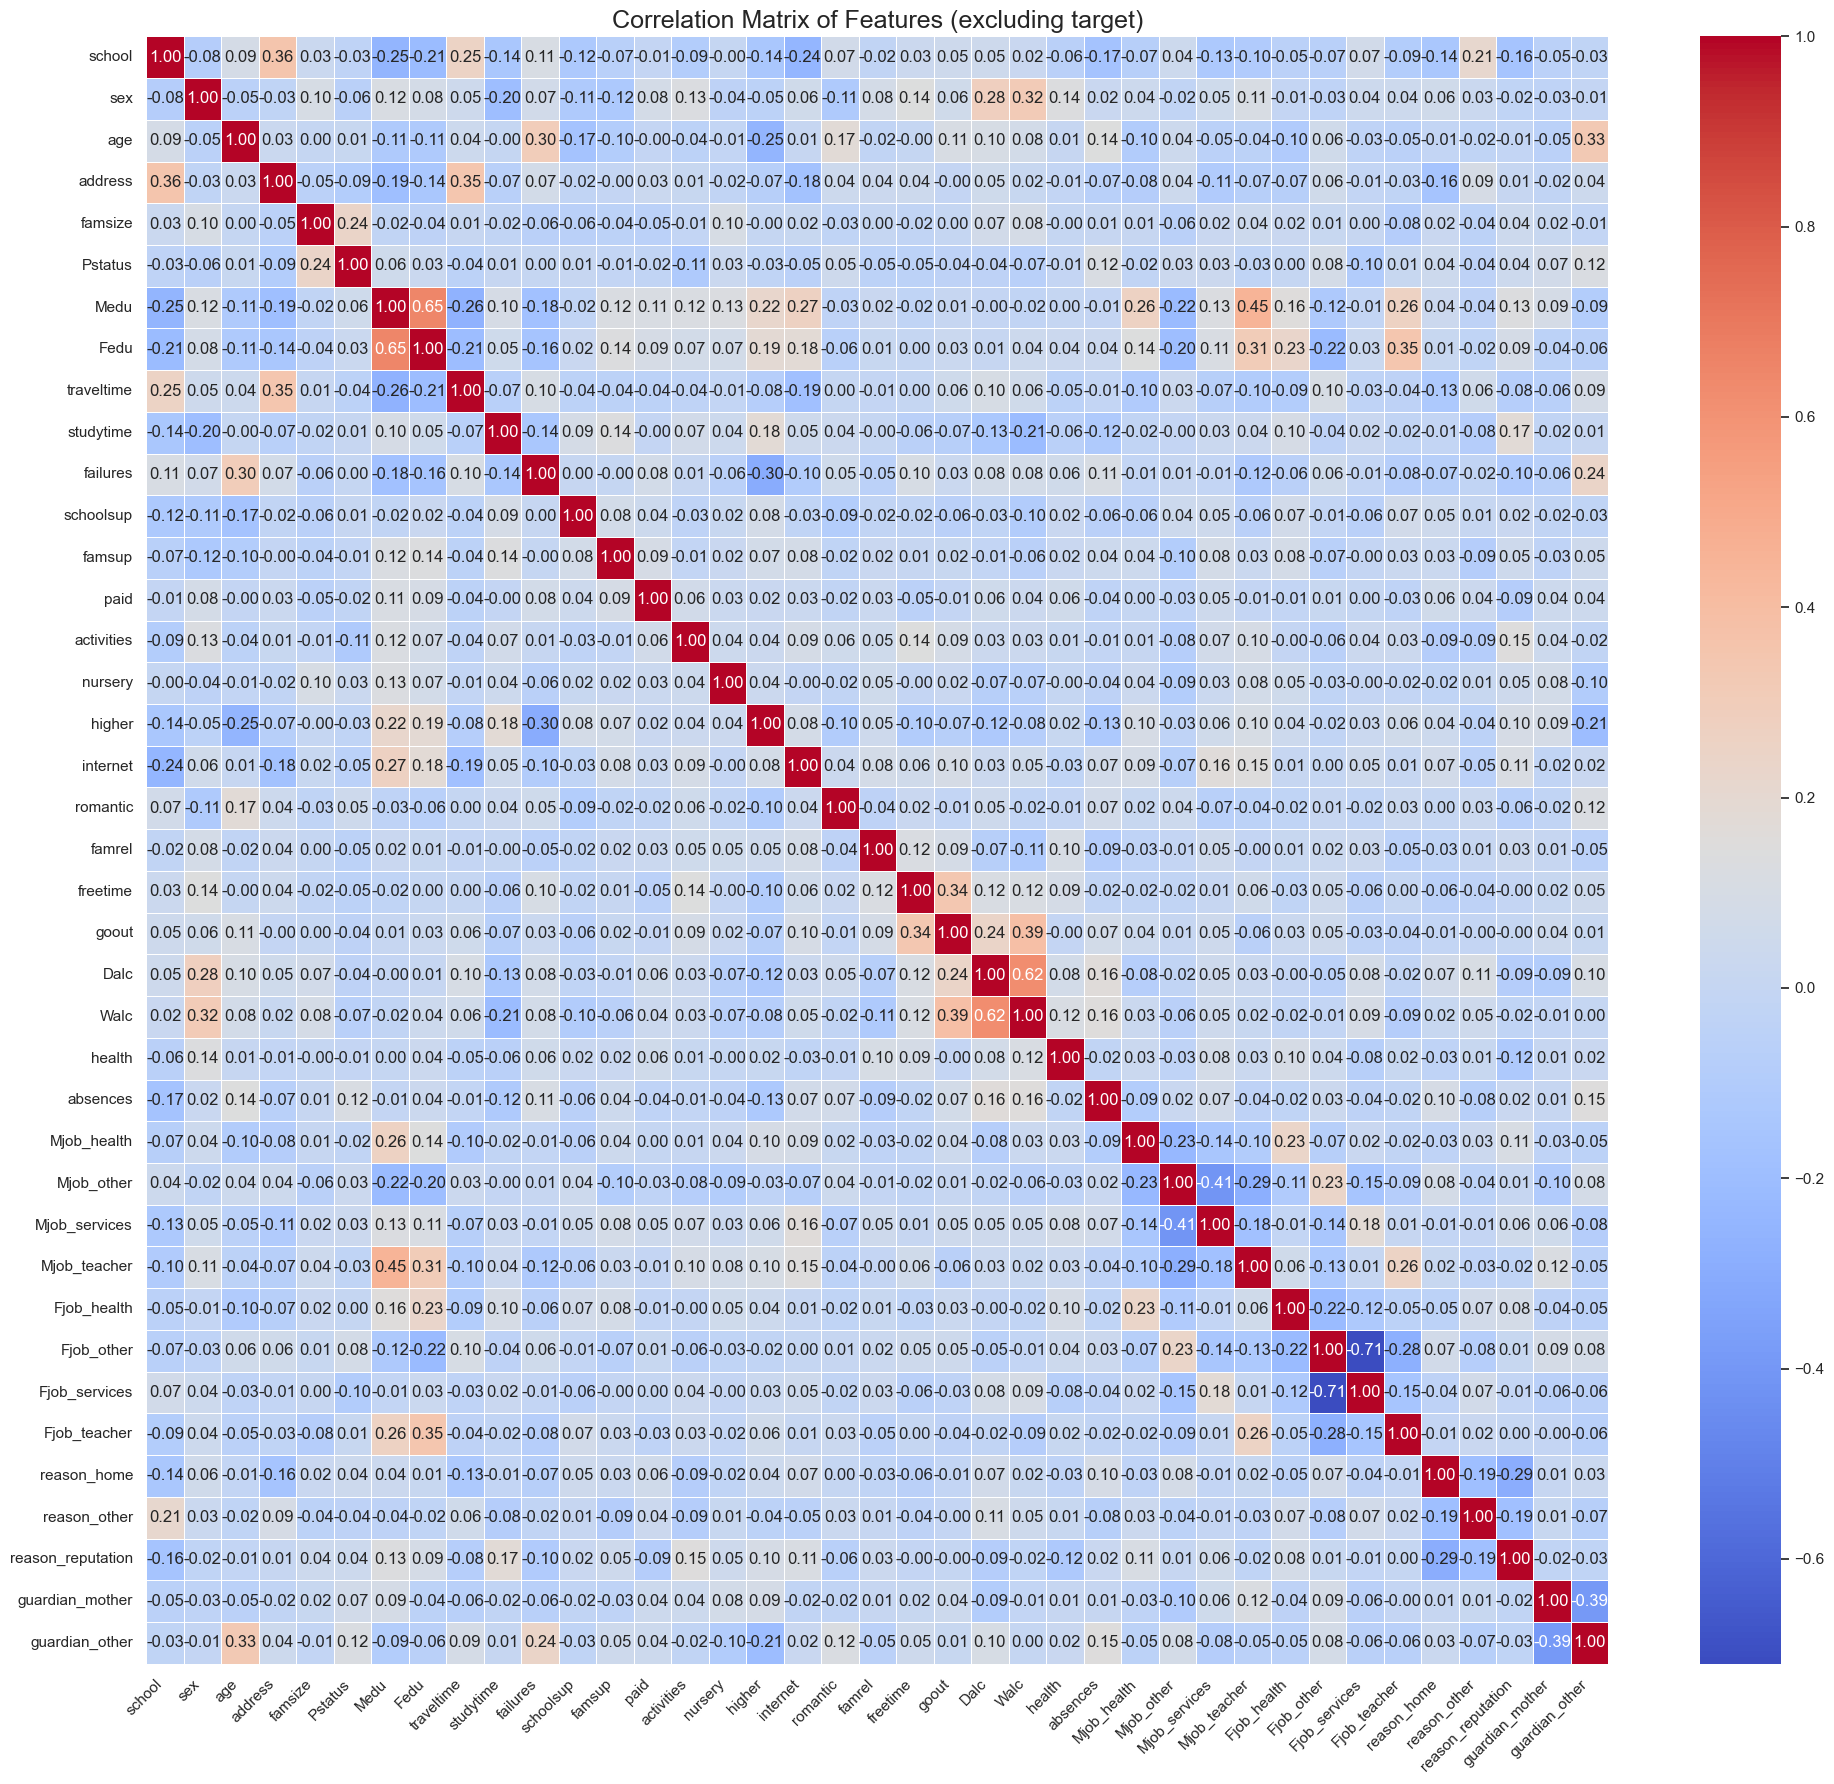

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

feature_df = df.drop(columns=['passed'])

corr_matrix = feature_df.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features (excluding target)', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


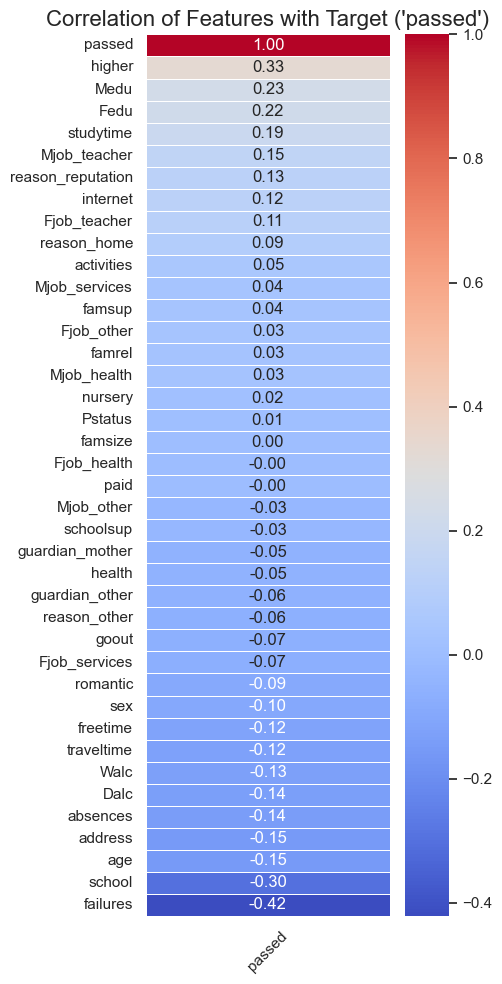

In [28]:
target_corr = df.corr()['passed'].sort_values(ascending=False)

# Plotting a heatmap to show the relationship between features and the target variable
plt.figure(figsize=(5, 10))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation of Features with Target ('passed')", fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# RFECV feature selection


=== Running RFECV with Logistic Regression ===
Optimal number of features: 30
Selected features: ['school', 'sex', 'address', 'famsize', 'Fedu', 'studytime', 'failures', 'schoolsup', 'paid', 'activities', 'nursery', 'higher', 'romantic', 'freetime', 'goout', 'Walc', 'health', 'absences', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other']


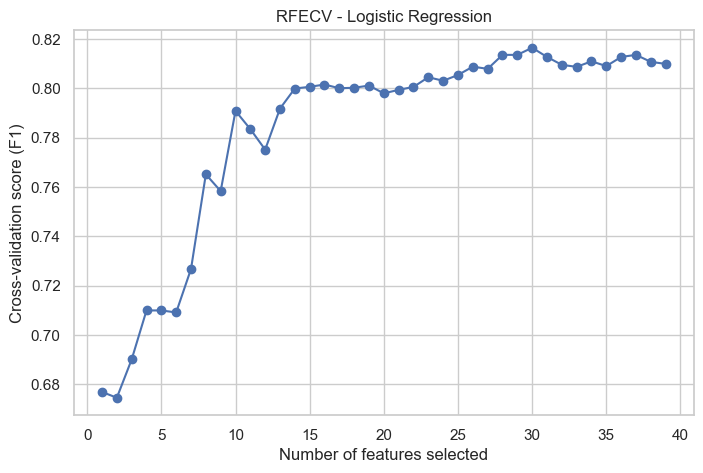


=== Running RFECV with Random Forest ===
Optimal number of features: 39
Selected features: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other']


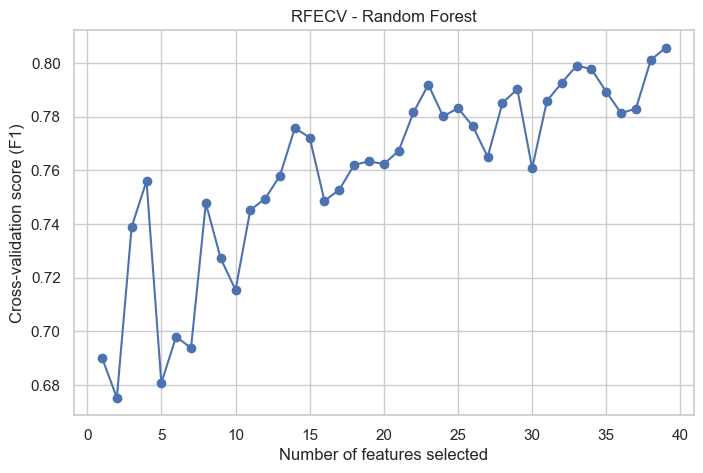

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

X = df.drop(columns=['passed'])
y = df['passed']

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver='liblinear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n=== Running RFECV with {name} ===")
    
    rfecv = RFECV(
        estimator=model,
        step=1,
        cv=StratifiedKFold(5),
        scoring='f1',
        n_jobs=-1
    )
    
    rfecv.fit(X, y)
    
    results[name] = {
        "n_features": rfecv.n_features_,
        "selected_features": X.columns[rfecv.support_].tolist(),
        "scores": rfecv.cv_results_['mean_test_score']
    }
    
    print("Optimal number of features:", rfecv.n_features_)
    print("Selected features:", results[name]["selected_features"])
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
             rfecv.cv_results_['mean_test_score'], marker='o')
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross-validation score (F1)")
    plt.title(f"RFECV - {name}")
    plt.show()


# Modeling

## Split test and train

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['passed'])  
y = df['passed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      
    stratify=y,         
    random_state=42 
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 515 samples
Test set size: 129 samples


In [31]:
df_with_G1['G1-pass'] = np.where(df_with_G1['G1'] >= 10, 1, 0)
df_with_G1 = df_with_G1.drop(['G1', 'G2'], axis=1)
df_with_G1.to_csv('data_with_G1.csv', index=False)

X_with_G1 = df_with_G1.drop(columns=['passed'])  
y_with_G1 = df_with_G1['passed']

X_train_with_G1, X_test_with_G1, y_train_with_G1, y_test_with_G1 = train_test_split(
    X_with_G1, y_with_G1, 
    test_size=0.2,      
    stratify=y,         
    random_state=42 
)

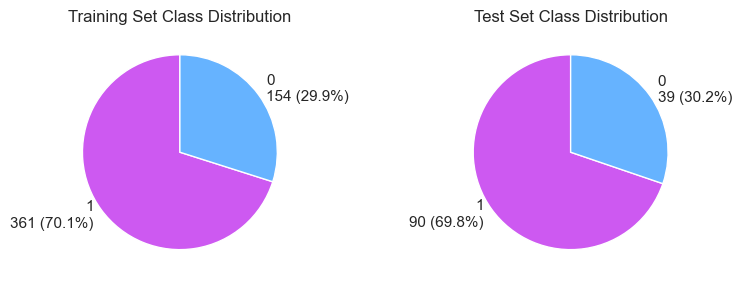

In [32]:
import matplotlib.pyplot as plt

def make_labels(counts):
    total = counts.sum()
    return [f"{cls}\n{cnt} ({cnt/total*100:.1f}%)" for cls, cnt in zip(counts.index, counts.values)]

colors = ['#CD59F1','#66B3FF']

fig, axes = plt.subplots(1, 2, figsize=(8,3))

train_counts = y_train.value_counts()
axes[0].pie(train_counts, labels=make_labels(train_counts), autopct='', startangle=90, colors=colors)
axes[0].set_title('Training Set Class Distribution')

test_counts = y_test.value_counts()
axes[1].pie(test_counts, labels=make_labels(test_counts), autopct='', startangle=90, colors=colors)
axes[1].set_title('Test Set Class Distribution')

plt.tight_layout()
plt.show()

# Random Forest

### Random Forest - Main Data

Accuracy: 0.8294573643410853

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.54      0.66        39
           1       0.83      0.96      0.89        90

    accuracy                           0.83       129
   macro avg       0.83      0.75      0.77       129
weighted avg       0.83      0.83      0.82       129



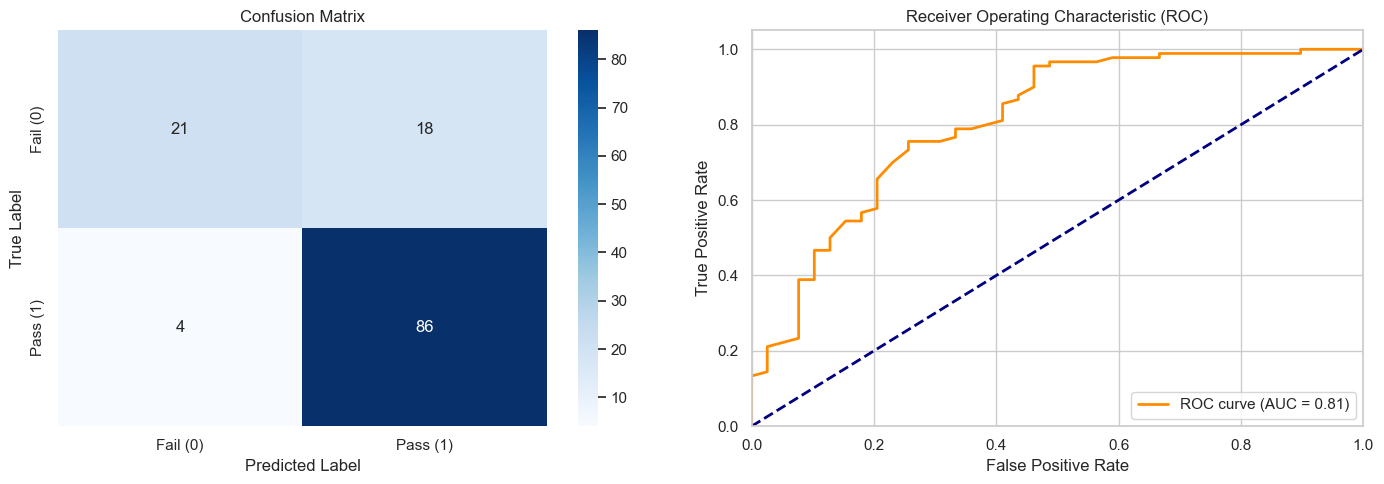

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
labels = ['Fail (0)', 'Pass (1)']

fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 
plt.subplots_adjust(wspace=2)

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# ROC Curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
             label='ROC curve (AUC = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


Class distribution before balancing: Counter({1: 361, 0: 154})

Running RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters: {'classifier__n_estimators': np.int64(200), 'classifier__min_samples_split': np.int64(10), 'classifier__min_samples_leaf': np.int64(7), 'classifier__max_depth': None}
Best F1 score on training data (with CV): 0.8566776993333484

Final performance report of the tuned model on test data:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        39
           1       0.83      0.89      0.86        90

    accuracy                           0.80       129
   macro avg       0.77      0.74      0.75       129
weighted avg       0.79      0.80      0.79       129



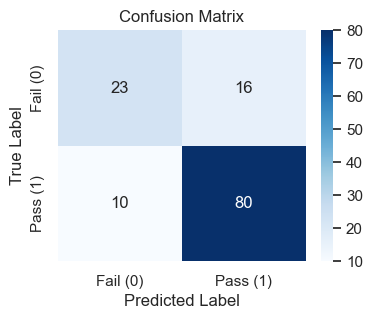

In [34]:
# improved model on 0 class recall
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('nearmiss', NearMiss(version=3)),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_dist = {
    'classifier__n_estimators': np.arange(100, 500, 50),
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': np.arange(2, 11),
    'classifier__min_samples_leaf': np.arange(1, 11),
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50, 
    cv=5,     
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Class distribution before balancing:", Counter(y_train))
print("\nRunning RandomizedSearchCV...")
random_search.fit(X_train, y_train)

print("\nBest parameters:", random_search.best_params_)
print("Best F1 score on training data (with CV):", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nFinal performance report of the tuned model on test data:")
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Fail (0)', 'Pass (1)']

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest - Data with G1

Running RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

--- Best parameters found: ---
{'n_estimators': np.int64(150), 'min_samples_split': np.int64(8), 'min_samples_leaf': np.int64(1), 'max_depth': 10, 'class_weight': 'balanced'}
--- Best F1 score (with CV): 0.86 ---

--- Final performance report of the tuned model on test data: ---
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        39
           1       0.88      0.92      0.90        90

    accuracy                           0.86       129
   macro avg       0.84      0.82      0.83       129
weighted avg       0.86      0.86      0.86       129



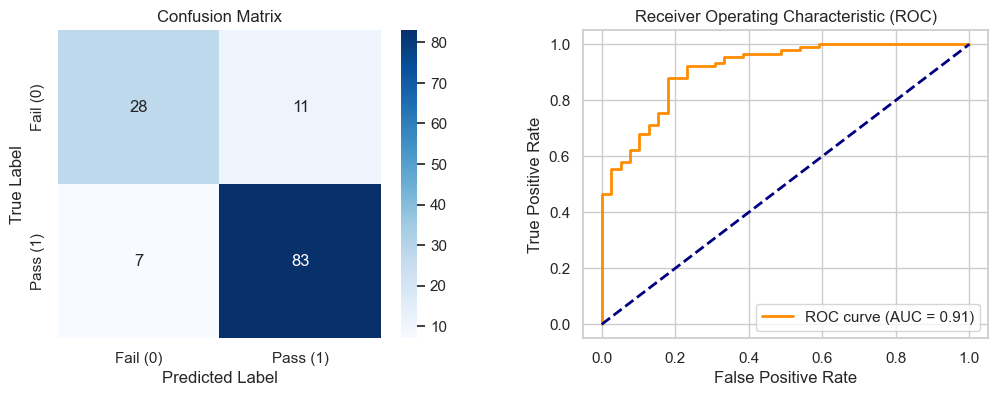

In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'class_weight': ['balanced', None] 
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,     
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
print("Running RandomizedSearchCV...")
random_search.fit(X_train_with_G1, y_train_with_G1)

print("\n--- Best parameters found: ---")
print(random_search.best_params_)
print(f"--- Best F1 score (with CV): {random_search.best_score_:.2f} ---")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_with_G1)
y_prob = best_model.predict_proba(X_test_with_G1)[:, 1]

print("\n--- Final performance report of the tuned model on test data: ---")
print(classification_report(y_test_with_G1, y_pred))

cm = confusion_matrix(y_test_with_G1, y_pred)
fpr, tpr, thresholds = roc_curve(y_test_with_G1, y_prob)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fail (0)', 'Pass (1)'], yticklabels=['Fail (0)', 'Pass (1)'], ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend(loc="lower right")

plt.show()

# KNN

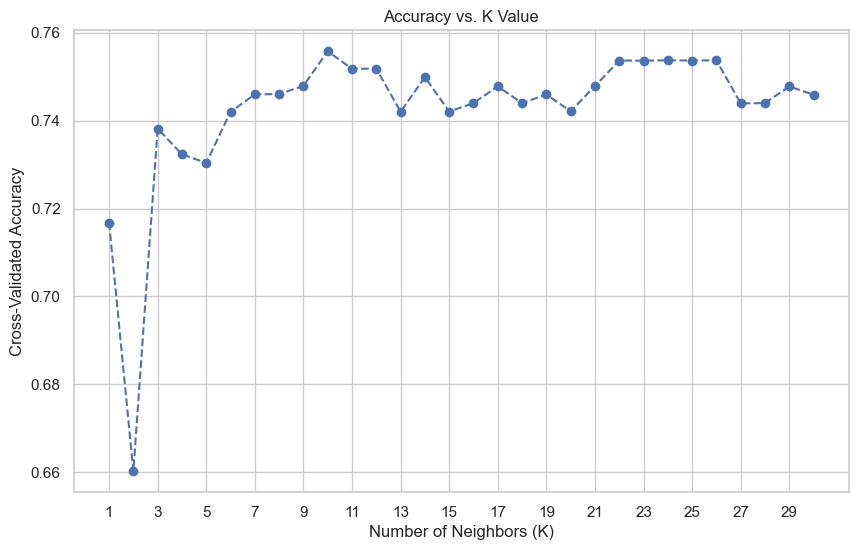

Best K value is: 10


In [36]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# رسم نمودار Accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='--')
plt.title('Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(np.arange(1, 31, 2))
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(k_scores)]
print(f"Best K value is: {best_k}")

### KNN - Main Data

Class distribution before balancing: Counter({1: 361, 0: 154})

Running RandomizedSearchCV...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

--- Best parameters: {'classifier__weights': 'uniform', 'classifier__p': 1}
--- Best F1 score on training data (with CV): 0.7394

--- Final model performance report on test data:
              precision    recall  f1-score   support

           0     0.5854    0.6154    0.6000        39
           1     0.8295    0.8111    0.8202        90

    accuracy                         0.7519       129
   macro avg     0.7075    0.7132    0.7101       129
weighted avg     0.7557    0.7519    0.7536       129



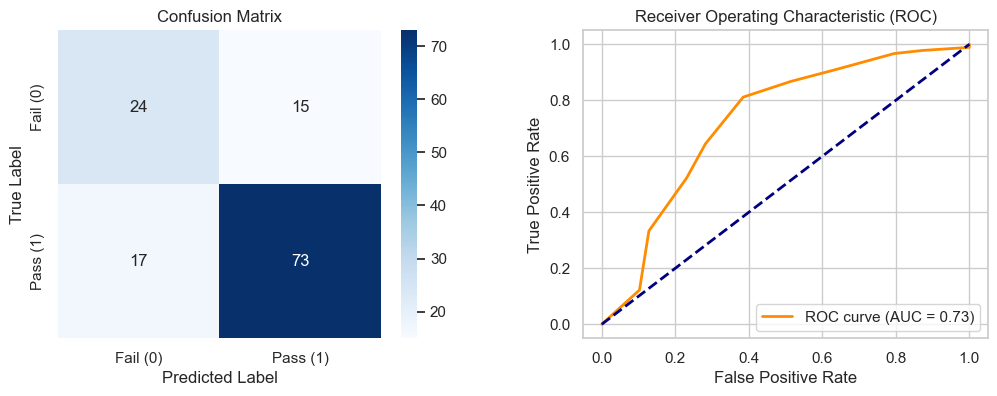

In [37]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=best_k))
])

param_dist = {
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]   # p=1 → Manhattan, p=2 → Euclidean
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=4, 
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Class distribution before balancing:", Counter(y_train))
print("\nRunning RandomizedSearchCV...")
random_search.fit(X_train, y_train)

print("\n--- Best parameters:", random_search.best_params_)
print(f"--- Best F1 score on training data (with CV): {random_search.best_score_:.4f}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\n--- Final model performance report on test data:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
labels = ['Fail (0)', 'Pass (1)']

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend(loc="lower right")

plt.show()


### KNN - Data with G1

Class distribution before balancing: Counter({1: 361, 0: 154})

Running RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

--- Best parameters: {'classifier__weights': 'uniform', 'classifier__p': 1, 'classifier__n_neighbors': np.int64(27)}
--- Best F1 score on training data (with CV): 0.8143

--- Final performance report of the tuned model on test data:
              precision    recall  f1-score   support

           0     0.6579    0.6410    0.6494        39
           1     0.8462    0.8556    0.8508        90

    accuracy                         0.7907       129
   macro avg     0.7520    0.7483    0.7501       129
weighted avg     0.7892    0.7907    0.7899       129



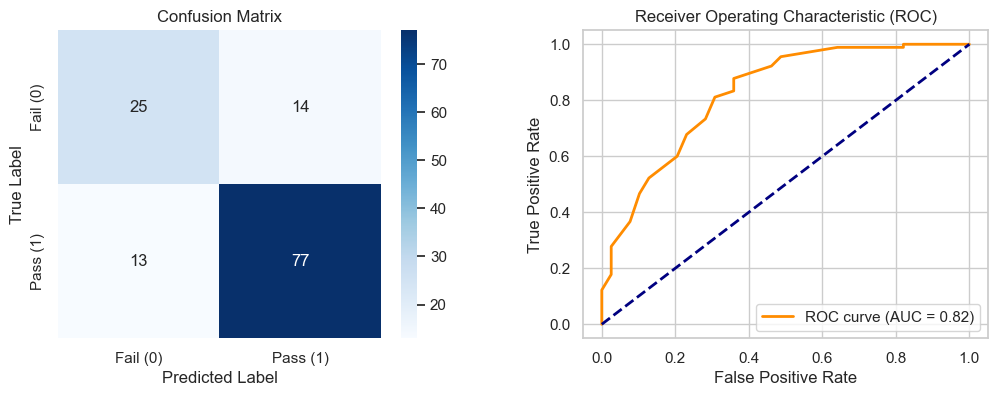

In [38]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

param_dist = {
    'classifier__n_neighbors': np.arange(1, 31),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50, 
    cv=5,     
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Class distribution before balancing:", Counter(y_train_with_G1))
print("\nRunning RandomizedSearchCV...")
random_search.fit(X_train_with_G1, y_train_with_G1)

print("\n--- Best parameters:", random_search.best_params_)
print(f"--- Best F1 score on training data (with CV): {random_search.best_score_:.4f}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_with_G1)
y_prob = best_model.predict_proba(X_test_with_G1)[:, 1]

print("\n--- Final performance report of the tuned model on test data:")
print(classification_report(y_test_with_G1, y_pred, digits=4))

cm = confusion_matrix(y_test_with_G1, y_pred)
labels = ['Fail (0)', 'Pass (1)']

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_with_G1, y_prob)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

# Confusion Matrix  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend(loc="lower right")

plt.show()


# Logistic Regression

### Logistic Regression - Main Data

Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Final performance report of the tuned model on test data:
              precision    recall  f1-score   support

           0     0.5870    0.6923    0.6353        39
           1     0.8554    0.7889    0.8208        90

    accuracy                         0.7597       129
   macro avg     0.7212    0.7406    0.7281       129
weighted avg     0.7743    0.7597    0.7647       129



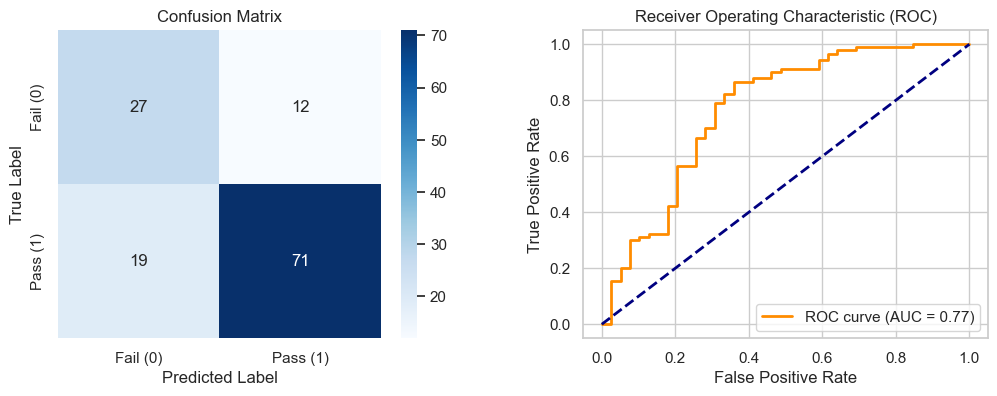

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns

selected_features_lr= ['school', 'sex', 'address', 'famsize', 'Fedu', 'studytime', 'failures', 'schoolsup', 'paid', 'activities', 'nursery', 'higher', 'romantic', 'freetime', 'goout', 'Walc', 'health', 'absences', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other']
X_train_selected_lr = X_train[selected_features_lr]
X_test_selected_lr = X_test[selected_features_lr]

pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, max_iter=1000))
])

param_dist = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train_selected_lr, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_selected_lr)
y_prob = best_model.predict_proba(X_test_selected_lr)[:, 1]

print("\n--- Final performance report of the tuned model on test data:") 
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
labels = ['Fail (0)', 'Pass (1)']

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

axes[1].plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend(loc="lower right")

plt.show()

### Logistic Regression - Data with G1

Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Final performance report of the tuned model on test data:
              precision    recall  f1-score   support

           0     0.7436    0.7436    0.7436        39
           1     0.8889    0.8889    0.8889        90

    accuracy                         0.8450       129
   macro avg     0.8162    0.8162    0.8162       129
weighted avg     0.8450    0.8450    0.8450       129



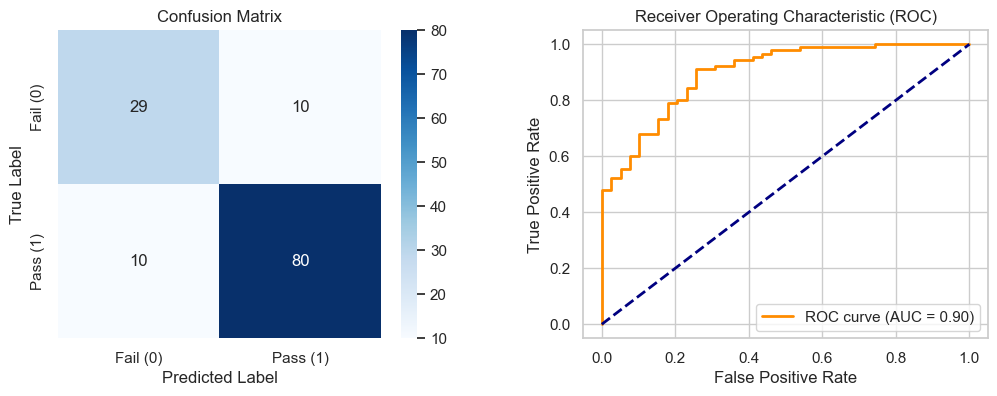

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns

selected_features_lr= ['school', 'sex', 'address', 'famsize', 'Fedu', 'studytime', 'failures', 'schoolsup', 'paid', 'activities', 'nursery', 'higher', 'romantic', 'freetime', 'goout', 'Walc', 'health', 'absences', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other','G1-pass']

X_train_G1_selected_lr = X_train_with_G1[selected_features_lr]
X_test_G1_selected_lr = X_test_with_G1[selected_features_lr]

pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, max_iter=1000))
])

param_dist = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train_G1_selected_lr, y_train_with_G1)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_G1_selected_lr)
y_prob = best_model.predict_proba(X_test_G1_selected_lr)[:, 1]

print("\n--- Final performance report of the tuned model on test data:") 
print(classification_report(y_test_with_G1, y_pred, digits=4))

cm = confusion_matrix(y_test_with_G1, y_pred)
labels = ['Fail (0)', 'Pass (1)']

fpr, tpr, thresholds = roc_curve(y_test_with_G1, y_prob)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

axes[1].plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend(loc="lower right")

plt.show()

# XGboost

### XGBoost - Main Data

Running RandomizedSearchCV...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

--- Best parameters: {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
--- Best F1 score in CV: 0.7506
Best threshold: 0.35 with F1-score: 0.8821

--- Confusion Matrix ---
[[20 19]
 [ 4 86]]

--- Classification Report ---
              precision    recall  f1-score   support

           0     0.8333    0.5128    0.6349        39
           1     0.8190    0.9556    0.8821        90

    accuracy                         0.8217       129
   macro avg     0.8262    0.7342    0.7585       129
weighted avg     0.8234    0.8217    0.8073       129



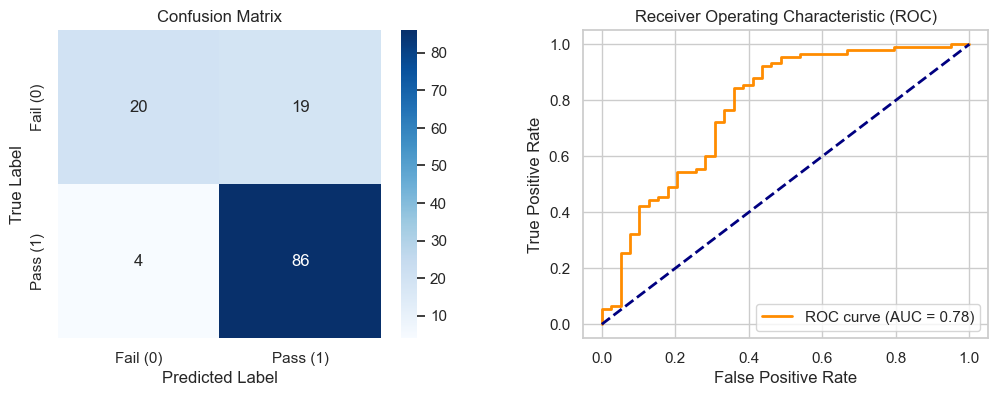

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score

negative_count = np.sum(y_train == 0)
positive_count = np.sum(y_train == 1)
scale_pos_weight_value = negative_count / positive_count

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value,
    random_state=42
)

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,             
    cv=5,
    scoring='f1_macro',   
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Running RandomizedSearchCV...")
random_search.fit(X_train, y_train)

print("\n--- Best parameters:", random_search.best_params_)
print(f"--- Best F1 score in CV: {random_search.best_score_:.4f}")

best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

y_prob = best_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = f1_scores.argmax()
best_threshold = thresholds_pr[best_idx]
print(f"Best threshold: {best_threshold:.2f} with F1-score: {f1_scores[best_idx]:.4f}")

y_pred = (y_prob >= best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
labels = ['Fail (0)', 'Pass (1)']

print("\n--- Confusion Matrix ---")
print(cm)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, digits=4))

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend(loc="lower right")

plt.show()


### XGBoost - Data with G1

Running RandomizedSearchCV...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

--- Best parameters: {'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
--- Best F1 score in CV: 0.8227
Best threshold: 0.31 with F1-score: 0.9140

--- Confusion Matrix ---
[[28 11]
 [ 5 85]]

--- Classification Report ---
              precision    recall  f1-score   support

           0     0.8485    0.7179    0.7778        39
           1     0.8854    0.9444    0.9140        90

    accuracy                         0.8760       129
   macro avg     0.8670    0.8312    0.8459       129
weighted avg     0.8743    0.8760    0.8728       129



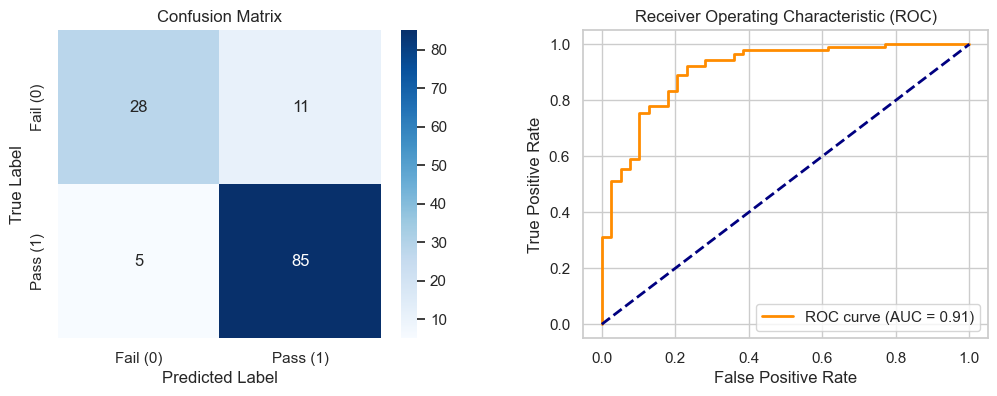

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score

negative_count = np.sum(y_train_with_G1 == 0)
positive_count = np.sum(y_train_with_G1 == 1)
scale_pos_weight_value = negative_count / positive_count

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value,
    random_state=42
)

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,             
    cv=5,
    scoring='f1_macro',   
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Running RandomizedSearchCV...")
random_search.fit(X_train_with_G1, y_train_with_G1)

print("\n--- Best parameters:", random_search.best_params_)
print(f"--- Best F1 score in CV: {random_search.best_score_:.4f}")

best_model = random_search.best_estimator_
best_model.fit(X_train_with_G1, y_train_with_G1)

y_prob = best_model.predict_proba(X_test_with_G1)[:, 1]

precisions, recalls, thresholds_pr = precision_recall_curve(y_test_with_G1, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = f1_scores.argmax()
best_threshold = thresholds_pr[best_idx]
print(f"Best threshold: {best_threshold:.2f} with F1-score: {f1_scores[best_idx]:.4f}")

y_pred = (y_prob >= best_threshold).astype(int)

cm = confusion_matrix(y_test_with_G1, y_pred)
labels = ['Fail (0)', 'Pass (1)']

print("\n--- Confusion Matrix ---")
print(cm)

print("\n--- Classification Report ---")
print(classification_report(y_test_with_G1, y_pred, digits=4))

fpr, tpr, _ = roc_curve(y_test_with_G1, y_prob)
roc_auc = auc(fpr, tpr)


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend(loc="lower right")

plt.show()
